# Deep Learning using PyTorch

In [1]:
!pip install -q torchvision

In [2]:
# Imports 
import time 
import torch 
import torchvision 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 
from torchvision import datasets, transforms 
import matplotlib.pyplot as plt 
import matplotlib 
import numpy as np 

In [3]:
# Packages versions 
%reload_ext watermark
%watermark -a "Data Snow" --iversions

autopep8    1.4.4
torchvision 0.6.1
matplotlib  3.1.3
json        2.0.9
torch       1.5.1
numpy       1.18.1
Data Snow


In [4]:
# Function to transform data when loaded
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

In [5]:
# Loading trainning dataset
dados_treino = torch.utils.data.DataLoader(datasets.MNIST('dados',
                                                         train=True,
                                                         download = True,
                                                         transform = transform),
                                          batch_size=64,
                                          shuffle=True)

In [42]:
dados_treino

In [6]:
# Loading Testing Dataset
dados_test = torch.utils.data.DataLoader(datasets.MNIST('dados',
                                                         train=True,
                                                         transform = transform),
                                          batch_size=64,
                                          shuffle=True)

In [7]:
# Visualizing dimesions in trainning dataset
dataiter = iter(dados_treino)
images, labels = dataiter.next()

print(images.shape) # batch size-quantity of registers per batch, quantity of batch, 28px, 28px
print(labels.shape) # quantity of labels

print(images[0], labels[0])

torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
   

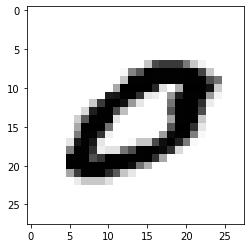

In [8]:
# Visualizing an image
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

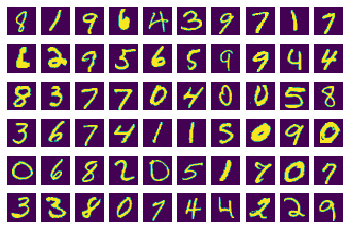

In [9]:
# Plotting many images
figure = plt.figure()
num_of_images = 60 
for index in range(1,num_of_images + 1):
    plt.subplot(6,10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze())

In [10]:
# Declaring hyperparameters
input_size = 784 # images with 28px x 28px 
hidden_size = [128, 64] # number of neuros by layers 
output_size = 10 # labels from 0 to 9

In [11]:
# Creating Model 
modelo_pt = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                         nn.ReLU(),
                          nn.Linear(hidden_size[0], hidden_size[1]), 
                          nn.ReLU(),
                          nn.Linear(hidden_size[1], output_size),
                          nn.LogSoftmax(dim=1)
                         )

In [22]:
print(modelo_pt)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [17]:
# Loss Function
criterion = nn.NLLLoss()

# Batch data
images, labels = next(iter(dados_treino))

# Shape adjusting
images = images.view(images.shape[0], -1)
print(images)
print(labels)

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])
tensor([2, 7, 2, 6, 4, 3, 2, 4, 8, 8, 8, 3, 2, 6, 4, 3, 2, 3, 6, 1, 0, 8, 7, 3,
        0, 7, 0, 5, 2, 4, 1, 1, 2, 0, 1, 5, 4, 5, 7, 2, 6, 7, 4, 5, 9, 7, 6, 0,
        0, 8, 7, 9, 5, 9, 0, 8, 1, 3, 5, 1, 2, 5, 7, 0])


In [24]:
print(images.shape[0])

64


In [18]:
# Probabilities log classes
logps = modelo_pt(images)
print(logps)

tensor([[-2.3309, -2.3089, -2.3332, -2.0329, -2.4205, -2.4922, -2.4059, -2.3120,
         -2.1664, -2.3023],
        [-2.2539, -2.3044, -2.3123, -2.1024, -2.4603, -2.4850, -2.3405, -2.3365,
         -2.1401, -2.3573],
        [-2.2439, -2.3551, -2.2991, -2.0848, -2.4953, -2.4717, -2.4495, -2.3620,
         -2.1015, -2.2572],
        [-2.2892, -2.2898, -2.3338, -2.0973, -2.3926, -2.4286, -2.3765, -2.3717,
         -2.1983, -2.2936],
        [-2.2884, -2.3145, -2.3944, -2.1071, -2.4872, -2.5335, -2.3598, -2.2780,
         -2.1445, -2.2040],
        [-2.3182, -2.2791, -2.2948, -2.1273, -2.4172, -2.5244, -2.3828, -2.3687,
         -2.1639, -2.2147],
        [-2.2658, -2.2432, -2.3583, -2.0501, -2.4463, -2.5107, -2.3757, -2.3296,
         -2.2322, -2.2885],
        [-2.2530, -2.2667, -2.3372, -2.1200, -2.4698, -2.4470, -2.3939, -2.3592,
         -2.1663, -2.2719],
        [-2.2789, -2.2111, -2.3078, -2.0998, -2.4419, -2.5442, -2.3920, -2.3809,
         -2.1920, -2.2545],
        [-2.2563, -

In [20]:
# Loss
loss = criterion(logps, labels)
print(loss)

tensor(2.3222, grad_fn=<NllLossBackward>)


In [23]:
# Backpropagation to model learning the best value to weights
print('\nBefore backward process \n', modelo_pt[0].weight.grad)
loss.backward()
print('\nAfter backward process \n', modelo_pt[0].weight.grad)


Before backward process 
 None

After backward process 
 tensor([[ 2.9128e-03,  2.9128e-03,  2.9128e-03,  ...,  2.9128e-03,
          2.9128e-03,  2.9128e-03],
        [-5.6379e-03, -5.6379e-03, -5.6379e-03,  ..., -5.6379e-03,
         -5.6379e-03, -5.6379e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [-2.0883e-03, -2.0883e-03, -2.0883e-03,  ..., -2.0883e-03,
         -2.0883e-03, -2.0883e-03],
        [-2.2755e-04, -2.2755e-04, -2.2755e-04,  ..., -2.2755e-04,
         -2.2755e-04, -2.2755e-04],
        [ 6.8983e-05,  6.8983e-05,  6.8983e-05,  ...,  6.8983e-05,
          6.8983e-05,  6.8983e-05]])


In [25]:
# Trainning model 
# Optimizer
optimizer = optim.SGD(modelo_pt.parameters(), lr=0.003, momentum=0.9)

# Number of epochs
epochs = 10

# Trainning Loop
for e in range(epochs):
    
    # Register start time
    start_time = time.time()
    
    # Error epoch received zero
    running_loss = 0 
    
    # Loop through images and labels 
    for images, labels in dados_treino:
        
        # Flatten images from dataset MNIST
        images = images.view(images.shape[0], -1)
        
        # Trainning Process
        # Gradients to zero
        optimizer.zero_grad()
        
        # Calculate output
        output = modelo_pt(images)
        # Calculate Error/loss
        loss = criterion(output, labels)
        
        # Learning with backpropagation 
        loss.backward()
        
        # Optimizing weights 
        optimizer.step()
        
        # Sum the loss by epochs
        running_loss += loss.item()
        print(running_loss)
    else:
        print('Epoch: {0}, Tempo Gasto: {1:.2f}s, Loss(Erro): {2}'.format(
        e,
        time.time() - start_time,
        running_loss / len(dados_treino)))

2.3183157444000244
4.628663778305054
6.949767827987671
9.274962663650513
11.558023452758789
13.879858493804932
16.179896354675293
18.491578102111816
20.781667232513428
23.07844352722168
25.36240267753601
27.654422283172607
29.937856674194336
32.22018218040466
34.491512060165405
36.77772283554077
39.078415632247925
41.336639165878296
43.606300592422485
45.892648696899414
48.174543380737305
50.42644262313843
52.66970944404602
54.91543960571289
57.16226673126221
59.38392210006714
61.63116407394409
63.86765670776367
66.10184907913208
68.3270936012268
70.54352498054504
72.7561342716217
74.97167563438416
77.20111799240112
79.40645837783813
81.60789251327515
83.79206490516663
85.99496030807495
88.16203761100769
90.32134509086609
92.48195576667786
94.61344408988953
96.80389189720154
98.98268103599548
101.14117050170898
103.26611280441284
105.4271674156189
107.5201997756958
109.63356852531433
111.74914813041687
113.85838413238525
115.94732403755188
118.0029182434082
120.12005472183228
122.16415

437.93879717588425
438.385662317276
438.79115015268326
439.26052898168564
439.8811938762665
440.19472259283066
440.5879232287407
441.0825426578522
441.74881142377853
442.0976031124592
442.5663883090019
442.89323857426643
443.3168243467808
443.6875070333481
444.0943758189678
444.5917939543724
444.97216016054153
445.27970004081726
445.85923606157303
446.20690405368805
446.65539211034775
446.9882984161377
447.2739935219288
447.6249194741249
448.0767000615597
448.4542152285576
448.94490921497345
449.3591468036175
449.8057013452053
450.2746995687485
450.5468027293682
451.047893255949
451.34793362021446
451.9160643517971
452.40431675314903
452.7758921980858
453.20275300741196
453.8355348110199
454.4921954870224
454.75665134191513
455.0896675288677
455.57208755612373
455.88650941848755
456.10957972705364
456.44400046765804
456.9156688004732
457.5586548000574
457.9331478625536
458.51914216578007
458.9761965125799
459.29847855865955
459.677989885211
459.8974157124758
460.4843017011881
460.89223

607.7609059810638
608.0424898862839
608.2972228229046
608.8433436453342
609.3180342614651
609.7516448199749
610.1921493709087
610.5977133512497
610.8402636796236
611.1465296596289
611.4149889200926
611.5649315267801
611.7713566869497
612.2662814408541
612.5036212652922
612.855348482728
613.1608894020319
613.5571587830782
613.8298448473215
614.1847266703844
614.6017260402441
614.8718618303537
615.1749141663313
615.4432971328497
615.6160597205162
Epoch: 0, Tempo Gasto: 9.61s, Loss(Erro): 0.6563070999152625
0.23380959033966064
0.49363625049591064
0.7461597323417664
1.0540173649787903
1.337062031030655
1.5755289793014526
1.8523080050945282
2.1750435829162598
2.3308256715536118
2.510493203997612
2.8441198617219925
3.155838504433632
3.464037850499153
3.7794448882341385
4.0389367789030075
4.324992761015892
4.7871556133031845
5.0210354924201965
5.255459845066071
5.5034532099962234
5.845605716109276
6.165317103266716
6.576200559735298
7.074552461504936
7.484045103192329
7.753280237317085
7.9934

127.98584900051355
128.1100853085518
128.43151435256004
128.71002274751663
129.01587235927582
129.2478799521923
129.4877634346485
129.95278397202492
130.2140982747078
130.34255322813988
130.6583772301674
130.9556199014187
131.09259048104286
131.38283011317253
131.52741657197475
131.72760973870754
132.10191605985165
132.53167732059956
132.8364991992712
132.9994938671589
133.2564368546009
133.54134410619736
134.0791153907776
134.39510482549667
134.69037979841232
135.00851675868034
135.37542095780373
135.77307015657425
136.24350655078888
136.69197836518288
136.9347679913044
137.28861114382744
137.60679867863655
137.90119752287865
138.2547369003296
138.5400885641575
139.0593219101429
139.27004638314247
139.4804468601942
139.8307758718729
140.02424436807632
140.26535664498806
140.63868169486523
140.87122330069542
141.08611451089382
141.34818051755428
141.61859421432018
141.9399449378252
142.20859874784946
142.56867609918118
142.9316440373659
143.10909460484982
143.27588522434235
143.5751834

252.77057652547956
253.21756269410253
253.57236539199948
254.02766608074307
254.3035532720387
254.50620091333985
254.70191137865186
254.95236035063863
255.67082204297185
255.83078937605023
256.0894170887768
256.49301086738706
256.5895592086017
256.87217543646693
257.2365182749927
257.5572865717113
257.76549066230655
257.9565215073526
258.29945823177695
258.48646235093474
258.9260857962072
259.2142243348062
259.45034524425864
259.6771340481937
259.889080863446
260.11778792366385
260.51688196882606
260.80977800115943
261.08969765529037
261.32100876793265
261.6534856520593
261.85800924524665
262.1450180672109
262.4586484692991
262.72511061653495
262.84932528063655
263.08480977639556
263.3105568997562
263.5224990360439
263.8535798601806
264.2134509496391
264.4941943101585
264.72610264644027
264.97250727936625
265.304520200938
265.49807281419635
265.9207287244499
266.1508443169296
266.29584177955985
266.50123346969485
266.8633977882564
267.1359173171222
267.33279582485557
267.55623587593436

95.02716774865985
95.31150383874774
95.57278962060809
95.85701162740588
95.99906293675303
96.18540761992335
96.59024650976062
96.88063014671206
97.11405071243644
97.26756582781672
97.43971320614219
97.94779082760215
98.16124970838428
98.32246492430568
98.65375692769885
98.85568883642554
99.10835611447692
99.36740463599563
99.72186705097556
99.8719528876245
100.25484254583716
100.52435606345534
100.77580695971847
100.97723911330104
101.21068039163947
101.46492927893996
101.65949993953109
101.85588475689292
102.15411114320159
102.33219004794955
102.69459674879909
102.94685349985957
103.23704953119159
103.45756375417113
103.64805252477527
103.9692339412868
104.33967698737979
104.65653316304088
104.82994576916099
105.06936987861991
105.22704910859466
105.43945517763495
105.74051704630256
105.84406199678779
106.0403871499002
106.18400413915515
106.28454238548875
106.51193586364388
106.64689389243722
106.83980659022927
107.165608022362
107.31063157692552
107.424356687814
107.71669380739331
1

194.14367002621293
194.47356579080224
194.6975674368441
194.7846588306129
194.98049032315612
195.0818504728377
195.1478935442865
195.3587772063911
195.70846719667315
195.92392803356051
196.09263157472014
196.39124682173133
196.650364395231
196.79361985251307
197.1199709288776
197.32273469492793
197.4451537244022
197.54764115437865
197.91580563411117
197.9801660887897
198.21091790124774
198.43724953755736
198.59432565793395
198.884293820709
199.0968242548406
199.2960126362741
199.47658681496978
199.66438556835055
199.92146615311503
200.076285880059
200.26369712874293
200.53749392554164
200.85791466757655
201.026565592736
201.24638360366225
201.4608209244907
201.8716299943626
202.04774440452456
202.3471392504871
202.50075997039676
202.81233597919345
202.96421530470252
203.19126280769706
203.45879700407386
203.61063345894217
203.7537619881332
203.86118537560105
203.96287923678756
204.2292124889791
204.36800685152411
204.54913597926497
204.8226214312017
204.97074113413692
205.1329458616674

65.51420484110713
65.65981581434608
65.92369249090552
66.09582846984267
66.34055482968688
66.62829675897956
66.77859682962298
66.91146714612842
67.10450584813952
67.28865638002753
67.62894194945693
67.91626301035285
68.0855933688581
68.20114975050092
68.4257710762322
68.6033743955195
68.71613449975848
68.83661024644971
69.08032279089093
69.23216209188104
69.37205760553479
69.51323405280709
69.61929582431912
69.80631159618497
69.96999748423696
70.05648222193122
70.13139702007174
70.23403907939792
70.35723166540265
70.52238412573934
70.850002694875
70.97219109162688
71.19790410622954
71.29514924809337
71.48272661492229
71.64084864780307
71.818100374192
71.99502709135413
72.25697749480605
72.39364252611995
72.83552042767406
73.02840537950397
73.27011499926448
73.48088408634067
73.78972757980227
74.10679138824344
74.40348185226321
74.60081709548831
74.84397637471557
74.95776963606477
75.20705715194345
75.31282688304782
75.60894099995494
75.79244739934802
75.93331978842616
76.14551293477416

150.90625590458512
151.09568220749497
151.24054476991296
151.71957570686936
151.84397953376174
151.94527446851134
152.19866832718253
152.32732312008739
152.517897259444
152.73056698963046
152.99849678203464
153.13011605665088
153.2394405566156
153.48040172085166
153.63521553203464
153.78145706281066
154.12664392217994
154.2730156444013
154.37529297545552
154.61593056097627
154.83121352270246
154.9603300280869
155.17197262123227
155.48027600720525
155.59334516897798
155.70142149552703
155.8355381153524
155.97969813272357
156.19086588546634
156.30684143677354
156.39444482699037
156.5213614590466
156.79217778518796
156.86763359233737
157.0339936874807
157.07871443778276
157.30534144490957
157.49617940932512
157.6868914887309
157.9191909506917
158.08497164398432
158.21985449641943
158.26563835516572
158.42211327329278
158.5885233618319
158.70346373692155
158.8449794985354
158.9756832756102
159.09060080721974
159.21200851723552
159.341409932822
159.3925334624946
159.5673826597631
159.834077

52.61978340707719
52.92782080732286
53.05539288185537
53.276604210957885
53.32486515305936
53.39556113444269
53.528925037011504
53.74760026298463
53.88712084852159
54.02035670541227
54.37804736755788
54.527728801593184
54.63373844884336
54.74054212681949
54.78498532809317
55.00308136083186
55.16268583573401
55.38554332591593
55.59915959276259
55.760744551196694
55.93871314264834
56.00374750979245
56.10091665573418
56.28024380095303
56.44614982791245
56.756546856835485
56.87314644642174
57.005712227895856
57.25528551824391
57.33553964085877
57.45367336459458
57.547787027433515
57.78371831960976
57.90727602131665
58.03545549698174
58.16879609413445
58.333219381049275
58.457902709022164
58.76588157750666
58.918378630653024
59.00865919329226
59.17481736280024
59.29734666086733
59.42868363298476
59.532823668792844
59.66578188724816
59.68987937271595
59.97477252781391
60.0569449365139
60.17492976039648
60.45642303675413
60.6283690109849
60.80412819236517
61.19432579725981
61.265313148498535


121.31588122807443
121.37825674004853
121.46824827231467
121.58743947930634
121.9015082437545
121.96939738281071
122.08463812060654
122.2359423507005
122.40314683504403
122.66689381189644
122.79091134853661
122.9393305350095
123.12983994372189
123.31429782696068
123.43094390816987
123.49138684011996
123.60642757453024
123.72936126030982
123.85511414147913
123.94368945248425
124.15913790650666
124.34281090088189
124.47191174514592
124.7559070456773
124.95037675090134
125.07829117961228
125.18946653045714
125.2316670063883
125.39191647805274
125.48021993227303
125.59311827458441
125.70732051320374
125.77164404280484
125.91366677172482
126.040451945737
126.13187136687338
126.31912063993514
126.44253753311932
126.56723483838141
126.75178500451148
126.79692315869033
126.94461864046752
127.09139606170356
127.2065830361098
127.32656862400472
127.42663268558681
127.48810532875359
127.77088970132172
127.8913853559643
127.99960410036147
128.1652388665825
128.2715838048607
128.32531066797674
128.

40.43242006376386
40.53135980293155
40.816917430609465
41.013143580406904
41.09467155113816
41.20689329877496
41.28138229623437
41.46151061728597
41.59906021133065
41.704246792942286
41.87488319352269
41.987302016466856
42.20418242737651
42.26252006366849
42.3571421392262
42.52099533751607
42.711094949394464
42.80319756641984
42.90004912391305
42.9768931530416
43.12253088876605
43.28641925379634
43.441054712980986
43.55289462581277
43.64415496960282
43.71722862496972
44.016158793121576
44.09375048801303
44.21351766958833
44.33431227877736
44.4107959009707
44.50492026284337
44.65723733976483
44.69156542047858
44.821330305188894
44.87755969911814
45.0409731939435
45.133909210562706
45.25592804700136
45.31652019545436
45.43402498587966
45.54407599940896
45.665503073483706
45.80831456556916
45.891312059015036
46.144713666290045
46.27455007657409
46.32542144879699
46.434557881206274
46.559503581374884
46.68147611990571
46.86501409485936
47.05868137255311
47.19492656365037
47.30699386820197


100.98950893431902
101.11016571521759
101.25489246845245
101.36702904105186
101.48443761467934
101.76027262210846
101.87529379874468
102.03638703376055
102.18573658913374
102.29608981311321
102.46413439512253
102.55796675384045
102.60929587110877
102.75001667067409
102.88396325334907
103.07161311432719
103.22347408160567
103.324651312083
103.36578345298767
103.45786715298891
103.61475928872824
103.81419519335032
103.88071811944246
103.96925078332424
104.10174413025379
104.35705117881298
104.40108899027109
104.48096850514412
104.65881583094597
104.86672540009022
105.01651385426521
105.1088423654437
105.1530626937747
105.24737399816513
105.33590769767761
105.39858473837376
105.48532275855541
105.65361304581165
105.86817795038223
105.99013527482748
106.10557328909636
106.22791791707277
106.36973420530558
106.54841136187315
106.80056711286306
106.8780272975564
106.99454239010811
107.1645708233118
107.27186821401119
107.36201173812151
107.48876383155584
107.53913228213787
107.61043092608452

32.83706004638225
32.8957960056141
32.982495655305684
33.052816030569375
33.193784159608185
33.31627794820815
33.4465127857402
33.48895885143429
33.563577459193766
33.65699376258999
33.96455331239849
34.018793248571455
34.090506167151034
34.22155708167702
34.411307574249804
34.46812713239342
34.53548908326775
34.61609605047852
34.67542452458292
34.85949493292719
35.03706450108439
35.10021793935448
35.216434204019606
35.45193193200976
35.4816110515967
35.617140718735754
35.67979355994612
35.829352968372405
35.93778878543526
36.117766306735575
36.21595168951899
36.40164563897997
36.63788939360529
36.69796468410641
36.76373396907002
36.895210147835314
37.037574083544314
37.199398265220225
37.30768019799143
37.434593432582915
37.57155754510313
37.6450986424461
37.79917982313782
37.908914246596396
38.04060954693705
38.06308343540877
38.13773554097861
38.21255388390273
38.36126128863543
38.57252676319331
38.62244552653283
38.7565754679963
38.797068185172975
38.86451344843954
38.9234365997836

86.93294287845492
87.01867846027017
87.0882013104856
87.2317981235683
87.34938791021705
87.39711535722017
87.53446874767542
87.63911554962397
87.74167145043612
87.80884118378162
87.9416016638279
88.02244608104229
88.20773273706436
88.29397625476122
88.32376454211771
88.35291229747236
88.45073249004781
88.49421173520386
88.60119989700615
88.66706910170615
88.88624190725386
88.9624888766557
89.00414271093905
89.14887456037104
89.22075768746436
89.29124657250941
89.34749785996974
89.39357647113502
89.59914193861187
89.7725728880614
89.8393088709563
89.94335608743131
90.07129739783704
90.12835706584156
90.15285709872842
90.18147670477629
90.26333250105381
90.31082904338837
90.44258973002434
90.48837829381227
90.5360888466239
90.58939252793789
90.72010998427868
90.94533795118332
91.0302227139473
91.09883781522512
91.28243761509657
91.37149956822395
91.5331484824419
91.59611955285072
91.62911474332213
91.75570062920451
91.83515654876828
91.898721691221
92.00168029591441
92.15524737164378
92.

27.117032242007554
27.203712654300034
27.312993434257805
27.515596684999764
27.55937681812793
27.625220817513764
27.726512094028294
27.835324940271676
27.96572617907077
28.044791360385716
28.058955415152013
28.165594867430627
28.26617345865816
28.369923680089414
28.481623402796686
28.630122221075
28.669163330458105
28.709918818436563
28.831307820044458
28.924396469257772
28.962049107067287
29.005915890447795
29.078900354914367
29.15254424046725
29.431436519138515
29.532132568769157
29.6701986072585
29.82040564995259
29.88648572843522
30.013861092738807
30.11092860531062
30.21410048287362
30.25528911780566
30.46640671323985
30.586898962967098
30.799849088303745
30.901325198821723
30.98692687880248
31.1050260765478
31.20612623821944
31.308621021918952
31.48534961324185
31.73702000360936
31.803797381930053
31.916689480654895
32.15498780738562
32.3557881815359
32.47199576627463
32.60386667679995
32.714548642747104
32.77150923665613
32.8552208757028
33.07177690323442
33.13131249602884
33.15

71.55155745241791
71.59875688422471
71.64320836309344
71.8091317648068
71.85956069547683
72.23652204591781
72.2954705292359
72.38059847149998
72.47141534928232
72.5018003238365
72.56534813623875
72.64171117823571
72.80544224660844
72.9576495019719
73.04720314126462
73.14591143559664
73.29907427262515
73.33296082075685
73.43966899719089
73.57299952115864
73.79279021825641
73.97238878812641
74.10367415752262
74.14537967648357
74.23087099846452
74.35372276511043
74.46093206759542
74.51053976546973
74.56324013974518
74.6363376667723
74.68184956815094
74.7027692263946
74.767098932527
74.83653049822897
74.93242993857712
75.0188385238871
75.09923408832401
75.23441111948341
75.28118456434458
75.43701472412795
75.46775171440095
75.6695255516097
75.7580377785489
75.8834335533902
76.01223179977387
76.09976898413152
76.17626305203885
76.24172780942172
76.33506112080067
76.40004996489733
76.47318163793534
76.64869325142354
76.77243090700358
76.95871117245406
77.10665653180331
77.144317320548
77.205

20.51168389711529
20.667003096081316
20.85286854300648
21.511252866126597
21.562284090556204
21.603424192406237
21.64879758004099
21.80145195964724
21.87430211994797
21.965929419733584
22.02236041519791
22.040326374582946
22.212158071808517
22.27111396100372
22.368244036100805
22.45135799702257
22.57872828003019
22.59659158717841
22.63118305709213
22.674604321829975
22.72336149495095
22.84480609279126
23.030502202920616
23.08879060205072
23.13388920109719
23.18671331461519
23.238373811356723
23.297935909591615
23.378030112944543
23.402028211392462
23.526463546790183
23.60769207868725
23.741077319718897
23.812012889422476
23.89555110130459
23.964938641525805
24.031401657499373
24.152824425138533
24.187612746842206
24.292055648751557
24.39330989588052
24.45421426091343
24.547983133234084
24.593950209207833
24.63531314674765
24.74751263204962
24.949557879008353
25.026170500554144
25.163281016983092
25.23615571204573
25.388930284418166
25.451814123429358
25.565756619907916
25.7327030310407

61.07655255123973
61.16957938298583
61.25974430516362
61.29121744632721
61.32757794484496
61.43108132109046
61.490761775523424
61.66581592336297
61.79722148552537
61.87087766453624
62.095180075615644
62.17390961572528
62.26115459576249
62.32496755197644
62.51662849262357
62.62565955147147
62.72795645520091
62.75859631039202
62.828592428937554
63.025153229013085
63.059076527133584
63.12867002375424
63.22735160775483
63.274892492219806
63.30574991367757
63.3326998334378
63.408259553834796
63.50862334482372
63.66447335295379
63.929825780913234
63.9828620608896
64.10469673387706
64.23073358647525
64.43573148362339
64.60720915906131
64.64737223647535
64.86440736614168
64.95811877958477
65.01469402946532
65.11720846034586
65.23494431562722
65.27640490420163
65.31906133331358
65.36180488951504
65.58395700342953
65.7278119046241
65.76118549518287
65.86421600542963
65.91550521738827
65.96763769723475
66.02763175405562
66.19082471169531
66.29748451896012
66.41873377747834
66.46295126341283
66.50

16.864997504279017
16.907614639028907
16.93676351197064
17.036491030827165
17.134437138214707
17.18348870240152
17.264924129471183
17.396014844998717
17.425394635647535
17.61162343248725
17.62324795499444
17.654508586972952
17.719324614852667
17.76655377820134
17.858228113502264
17.99558898434043
18.02877937629819
18.100412752479315
18.15716838464141
18.218131590634584
18.33408172056079
18.343398360535502
18.38053980283439
18.453924810513854
18.541194489225745
18.567693416029215
18.642561499029398
18.69295082986355
18.71547018736601
18.737305196002126
18.77045405842364
18.89600936509669
18.932629572227597
19.013263227418065
19.112778099253774
19.195462668314576
19.318924764171243
19.515060672536492
19.626344772055745
19.636216931045055
19.660318594425917
19.747109349817038
19.787975024431944
19.80799489840865
19.931489024311304
20.07010993734002
20.200850654393435
20.27896959707141
20.29473766312003
20.461832221597433
20.53685510531068
20.55518179014325
20.613134313374758
20.6448913849

51.76189946755767
51.97022969648242
52.0184182561934
52.032441860064864
52.16984683834016
52.302002957090735
52.337916845455766
52.41957854665816
52.52378343977034
52.57991128601134
52.62473408691585
52.661458337679505
52.71464162506163
52.76424656994641
52.85865112580359
52.97753983922303
53.05665280111134
53.192243518307805
53.30094823427498
53.34263505600393
53.37964737601578
53.46368479169905
53.74854686297476
53.81518383510411
53.88159534521401
53.9522282872349
54.06511254794896
54.186566384509206
54.381740333512425
54.454209903255105
54.501692892983556
54.58585746772587
54.75868140347302
54.82812931574881
54.943359868600965
55.002481481060386
55.0232886262238
55.112516570836306
55.15791378170252
55.3701201453805
55.42677649855614
55.45564955845475
55.621853683143854
55.710286755114794
55.802031334489584
55.819815965369344
55.94672519154847
56.03570312447846
56.1703289616853
56.30586043186486
56.33892427198589
56.47732180170715
56.53307252936065
56.581889348104596
56.6374103631824

In [27]:
# Evaluation and test
# Function to visualize classification
def visualiza_classe(img, ps):
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize = (6,9), ncols = 2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Probabilidade de Classe')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [34]:
# Getting one image to test
images, labels = next(iter(dados_test))

# Adjusting image 
img = images[0].view(1,784)

# Making prediction class
with torch.no_grad():
    logps = modelo_pt(img)
    
# Probability log of prediction
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
# Lista com os valores das probabilidades por classe
print(probab)

[0.9999926, 7.0194933e-10, 5.3172457e-06, 5.0689604e-09, 6.375709e-11, 1.6582785e-06, 4.3195108e-08, 3.313348e-09, 3.592156e-07, 9.553318e-09]


In [35]:
# Printing class
print("Predicted Digit =", probab.index(max(probab)))

Predicted Digit = 0


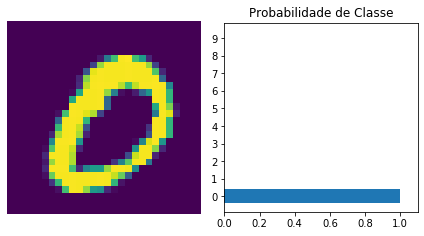

In [36]:
# Visualizing Class
visualiza_classe(img.view(1,28,28), ps)

In [38]:
# Calculate Accuracy in Testing Data
correct_count, all_count = 0, 0 

# to each register in dados_teste
for images, labels in dados_test:
    # to each label in dados_teste
    for i in range(len(labels)):
        # Shape input_data
        img = images[i].view(1,784)
        # Apply model created
        with torch.no_grad():
            logps = modelo_pt(img)
        
        # Probability
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if (true_label == pred_label):
            correct_count += 1
        all_count += 1

print('\nNumber of tested images:', all_count)
print('\nAccuracy in Testing Data:', (correct_count/all_count))
        


Number of tested images: 60000

Accuracy in Testing Data: 0.9753


In [39]:
# Saving model 
torch.save(modelo_pt, 'modelos/lucas_modelo_pt.pt')